In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/praktikumML/praktikum7"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
import pandas as pd


df = pd.read_csv('/content/gdrive/MyDrive/PraktikumML/praktikum7/data/apples_and_oranges.csv')
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [5]:
print("\nInformasi dataset:")
print(df.info())

print("\nStatistik deskriptif:")
print(df.describe())

print("\nJumlah data kosong (missing value) tiap kolom:")
print(df.isnull().sum())



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB
None

Statistik deskriptif:
          Weight       Size
count  40.000000  40.000000
mean   70.200000   4.922750
std     3.039906   0.590063
min    65.000000   4.010000
25%    68.000000   4.360000
50%    70.000000   4.930000
75%    73.000000   5.472500
max    75.000000   5.850000

Jumlah data kosong (missing value) tiap kolom:
Weight    0
Size      0
Class     0
dtype: int64


In [6]:
print("\nNama kolom & tipe data")
print(df.dtypes)



Nama kolom & tipe data
Weight      int64
Size      float64
Class      object
dtype: object


In [7]:
print("\nJumlah data per jenis buah")
print(df["Class"].value_counts())


Jumlah data per jenis buah
Class
orange    20
apple     20
Name: count, dtype: int64


In [8]:
print("\nRata rata berat & ukuran per jenis")
print(df.groupby("Class").mean(numeric_only=True))


Rata rata berat & ukuran per jenis
        Weight    Size
Class                 
apple    72.75  5.4475
orange   67.65  4.3980


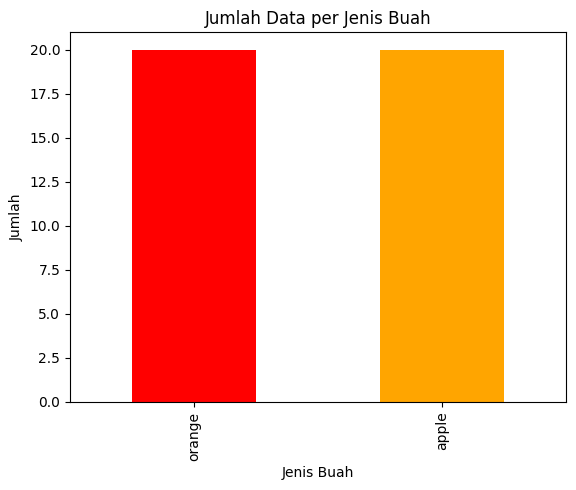

In [9]:
df["Class"].value_counts().plot(kind="bar", color=["red", "orange"])
plt.title("Jumlah Data per Jenis Buah")
plt.xlabel("Jenis Buah")
plt.ylabel("Jumlah")
plt.show()


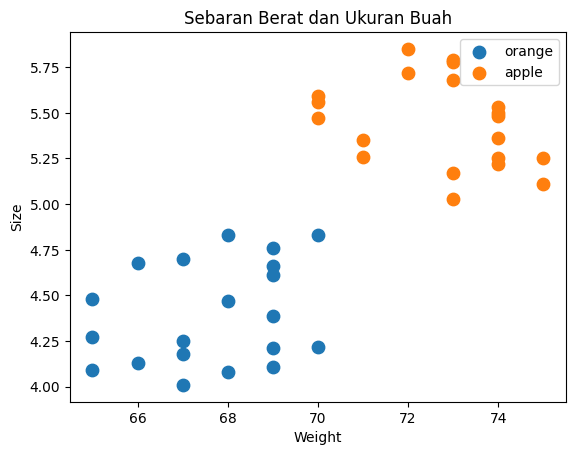

In [10]:
for label in df["Class"].unique():
    subset = df[df["Class"] == label]
    plt.scatter(subset["Weight"], subset["Size"], label=label, s=80)
plt.xlabel("Weight")
plt.ylabel("Size")
plt.title("Sebaran Berat dan Ukuran Buah")
plt.legend()
plt.show()

In [11]:
print("\nKorelasi antar fitur")
print(df.corr(numeric_only=True))



Korelasi antar fitur
          Weight      Size
Weight  1.000000  0.765027
Size    0.765027  1.000000


In [12]:
X = df[["Weight", "Size"]]
y = df["Class"]

In [13]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [14]:
print("\n===== VARIABEL X (FITUR) =====")
print(X.head())

print("\n===== VARIABEL y (TARGET ASLI) =====")
print(y.head())

print("\n===== VARIABEL y (SETELAH DI-ENCODE) =====")
print(pd.DataFrame({"Class": y, "Encoded": y_encoded}).head())


===== VARIABEL X (FITUR) =====
   Weight  Size
0      69  4.39
1      69  4.21
2      65  4.09
3      72  5.85
4      67  4.70

===== VARIABEL y (TARGET ASLI) =====
0    orange
1    orange
2    orange
3     apple
4    orange
Name: Class, dtype: object

===== VARIABEL y (SETELAH DI-ENCODE) =====
    Class  Encoded
0  orange        1
1  orange        1
2  orange        1
3   apple        0
4  orange        1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


In [16]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
y_pred = svm_model.predict(X_test)

In [18]:
print("\n===== HASIL EVALUASI MODEL =====")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


===== HASIL EVALUASI MODEL =====
Akurasi: 1.0

Confusion Matrix:
[[6 0]
 [0 6]]

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         6
      orange       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [19]:
x_min, x_max = X["Weight"].min() - 1, X["Weight"].max() + 1
y_min, y_max = X["Size"].min() - 1, X["Size"].max() + 1


In [20]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


In [21]:
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


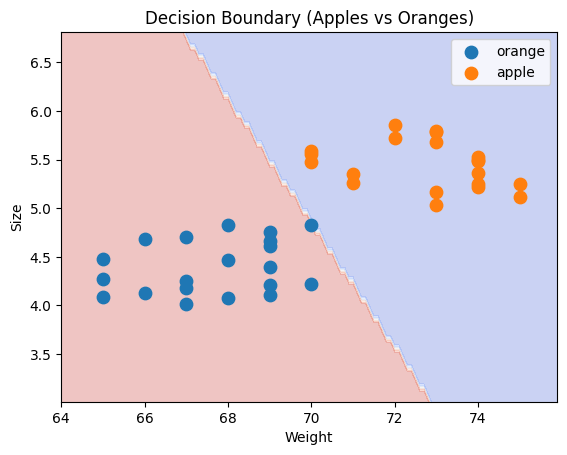

In [22]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
for label in df["Class"].unique():
    subset = df[df["Class"] == label]
    plt.scatter(subset["Weight"], subset["Size"], label=label, s=80)
plt.xlabel("Weight")
plt.ylabel("Size")
plt.title("Decision Boundary (Apples vs Oranges)")
plt.legend()
plt.show()


In [23]:
print("""
===== ANALISIS HASIL =====
Model SVM berhasil memisahkan data apel dan jeruk berdasarkan berat dan ukuran.
Akurasi menunjukkan seberapa baik model mengenali jenis buah.
Decision boundary (garis pemisah) pada grafik menunjukkan batas antara area prediksi apel dan jeruk.
Jika titik data apel dan jeruk tidak banyak tumpang tindih, berarti model sudah sangat baik.
Model ini bisa dipakai untuk memprediksi jenis buah baru jika diberikan berat dan ukuran.
""")


===== ANALISIS HASIL =====
Model SVM berhasil memisahkan data apel dan jeruk berdasarkan berat dan ukuran.
Akurasi menunjukkan seberapa baik model mengenali jenis buah.
Decision boundary (garis pemisah) pada grafik menunjukkan batas antara area prediksi apel dan jeruk.
Jika titik data apel dan jeruk tidak banyak tumpang tindih, berarti model sudah sangat baik.
Model ini bisa dipakai untuk memprediksi jenis buah baru jika diberikan berat dan ukuran.

